## US ACCIDENTS CAPSTONE PROJECT

##### Description

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.0 million accident records in this dataset. Check here to learn more about this dataset.

##### Content

This data has been collected in real-time, using multiple Traffic APIs. Currently, it contains data that is collected from February 2016 to December 2019 for the Contiguous United States. Check here to learn more about this dataset.

##### Inspiration

US-Accidents can be used for numerous applications such as real-time accident prediction, studying accident hotspot locations, casualty analysis and extracting cause and effect rules to predict accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence.

##### References

Please cite the following papers if you use this dataset:

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.
Content

This data has been collected in real-time, using multiple Traffic APIs. Currently, it contains data that is collected from February 2016 to December 2019 for the Contiguous United States. 

##### Usage Policy and Legal Disclaimer

This dataset is being distributed only for Research purposes, under Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). By clicking on download button(s) below, you are agreeing to use this data only for non-commercial, research, or academic applications. You may need to cite the above papers if you use this dataset.

##### Import Libraries and Get Data

This data is available at kaggle, let's use necessary libraries and get the data from there as followings:

In [1]:
# Hiding all Python level warnings from their users by default
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# linear algebra
import numpy as np
# data processing
import pandas as pd
# scientific computing and technical computing
import scipy
# statistical data visualization
import seaborn as sns
# Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
%matplotlib inline
import os    
import csv

In [5]:
#path = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
us_accident = pd.read_csv('US_Accidents_Dec19.csv')
us_accident.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


##### Explanatory Data Analysis

In [6]:
us_accident.shape

(2974335, 49)

In [7]:
us_accident.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [10]:
# Lets check the nan values with in each column / feature
# percentage of missing values in each column
#print((100*us_accident.isnull().sum()/us_accident.shape[0]).round(2))

total = us_accident.isnull().sum().sort_values(ascending=False)
percent_1 = us_accident.isnull().sum()/us_accident.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'], sort=False)
missing_data.head(10)

,Total,%
End_Lat,2246264,75.5
End_Lng,2246264,75.5
Precipitation(in),1998358,67.2
Number,1917605,64.5
Wind_Chill(F),1852623,62.3
TMC,728071,24.5
Wind_Speed(mph),440840,14.8
Weather_Condition,65932,2.2
Visibility(mi),65691,2.2
Humidity(%),59173,2.0


The less missing value in the column can easily be filled whilst the larger amount of missing value will be more tricky to deal with. We might want to drop that have larger amount of missing value column from the dataset such as 'TMC', 'End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Precipitation(in)'.

Let's drop these columns as shown below:

In [11]:
# drop these columns and check the shape again
us_acc_new = us_accident.drop(['TMC', 'End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Precipitation(in)'], axis = 1)
us_acc_new.dropna(axis = 0, how = 'any', inplace = True)
us_acc_new.shape

(2881492, 42)

In [12]:
# Number of accidents by each state
accident_state=us_acc_new.groupby(['State'], as_index=False).count().iloc[:,:2]
# Rename the column that make more sence
accident_state=accident_state.rename(columns={"ID":"NrAccidents"})
# sort by number of accidents
accident_state.sort_values(by=['NrAccidents'], ascending=False, inplace=True)
accident_state.head()

,State,NrAccidents
3,CA,640762
41,TX,289488
8,FL,218537
38,SC,142600
25,NC,141094


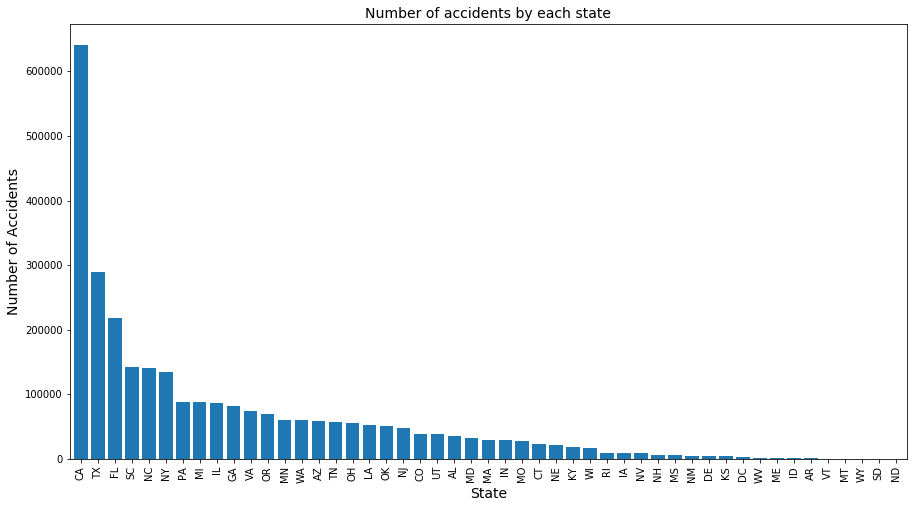

In [13]:
# set the state names as the index
accident_state.set_index('State', inplace=True)
# plot data in bar chart
accident_state.plot(kind='bar', width=0.8, figsize=(15, 8), legend=False)
plt.xlabel('State', fontsize=14) # add to x-label to the plot
plt.ylabel('Number of Accidents', fontsize=14) # add y-label to the plot
plt.title('Number of accidents by each state', fontsize=14) # add title to the plot
plt.show()

In [121]:
# add four new columns 'year', 'month', 'hour'
us_acc_new['Year'] = pd.DatetimeIndex(us_acc_new['Start_Time']).year
us_acc_new['Month'] = pd.DatetimeIndex(us_acc_new['Start_Time']).month
us_acc_new['Day']=pd.DatetimeIndex(us_acc_new['Start_Time']).day
us_acc_new['Hour'] = pd.DatetimeIndex(us_acc_new['Start_Time']).hour
us_acc_new['Weekday']=pd.DatetimeIndex(us_acc_new['Start_Time']).strftime('%a')

In [15]:
acc_month=us_acc_new[us_acc_new['Year'].isin(['2016','2017', '2018', '2019'])].groupby(['Month'], as_index=False).count().iloc[:,:2]
# by changing the argument in 'isin()' one can look at quite directly the change of the accidents during the years,
# which I did not do it here.
acc_month.head(12)

,month,ID
0,1,202883
1,2,192533
2,3,201905
3,4,206967
4,5,203838
5,6,200671
6,7,214785
7,8,280466
8,9,282614
9,10,314493


In [16]:
yearly=us_acc_new[us_acc_new['month'].isin(['1','2', '3', '4', '5','6','7','8','9','10','11','12'])].groupby(['year'], as_index=False).count().iloc[:,:2]
# by changing the argument in 'isin()' one can look at quite directly the change of the accidents during the years,
# which I did not do it here.
yearly.head()

,year,ID
0,2016,397771
1,2017,694396
2,2018,864910
3,2019,924415


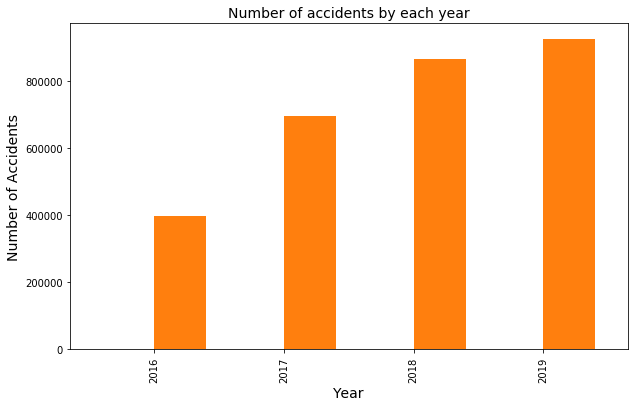

In [17]:
# plot data in bar chart
ax=yearly.plot(kind='bar', width=0.8, figsize=(10, 6), legend=None)
xtick_labels=['2016', '2017', '2018', '2019']
ax.set_xticks(list(yearly.index))
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Year', fontsize=14) # add to x-label to the plot
ax.set_ylabel('Number of Accidents', fontsize=14) # add y-label to the plot
ax.set_title('Number of accidents by each year', fontsize=14) # add title to the plot
plt.show()

(-127.49936636326173, -64.23763363673828, 23.332922399999998, 50.2245476)

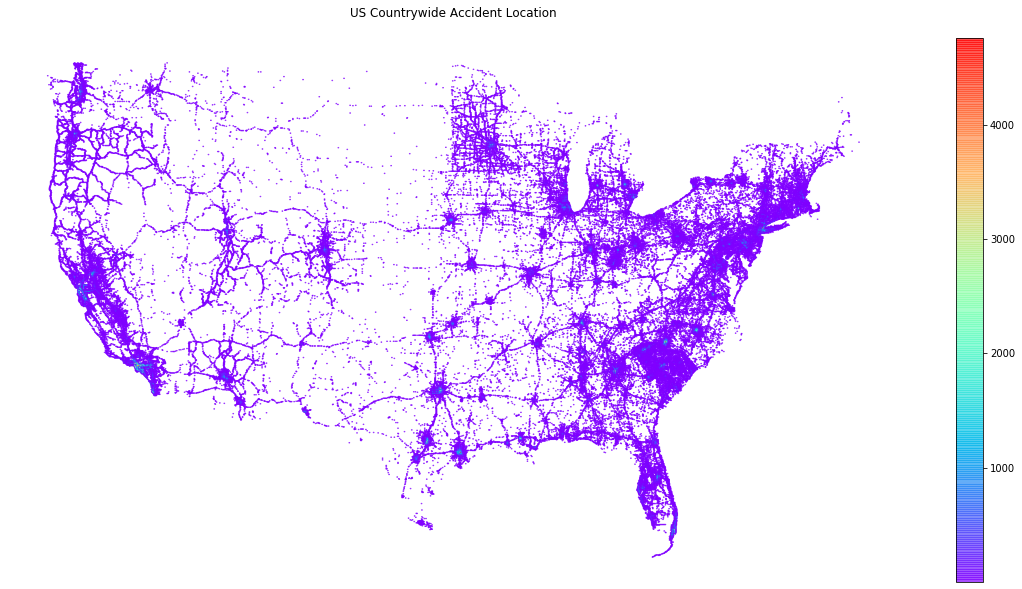

In [109]:
us_acc_new.plot(kind='hexbin', x='Start_Lng', y='Start_Lat', gridsize=1000,
    colormap = 'rainbow',mincnt=1,title = 'US Countrywide Accident Location\n', 
                alpha=0.7,fontsize = 26,figsize=(20,10)).axis('off')

Let's also plot the relationship between severity of accident and traffic signal:

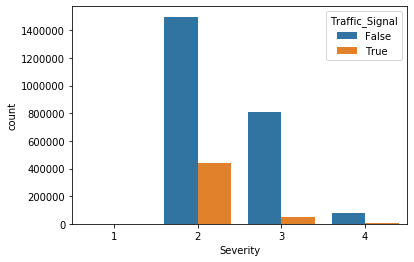

In [83]:
# Relationship between severity and traffic signal
sns.countplot(us_acc_new['Severity'], hue=us_acc_new['Traffic_Signal'])

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text yticklabel objects>)

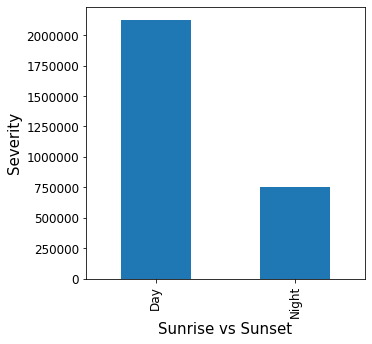

In [139]:
plt.figure(figsize=(5,5))
df = us_acc_new.groupby(['Sunrise_Sunset'])
df.Severity.count().plot(kind='bar')
plt.ylabel("Severity", fontsize=(15))
plt.xlabel("Sunrise vs Sunset", fontsize=(15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [ ]:
plt.figure(figsize=(5,5))
df = us_acc_new.groupby(['State'])
df.Severity.mean().plot(kind='hexbin',x='Start_Lng', y='Start_Lat', gridsize=1000,
    colormap = 'rainbow',mincnt=1,title = 'US Countrywide Accident Location\n', 
                alpha=0.7,fontsize = 26,figsize=(20,10)).axis('off')

In [135]:
severity_state = us_acc_new.groupby(['Severity'])['State'].count()
severity_state = pd.DataFrame(severity_state)

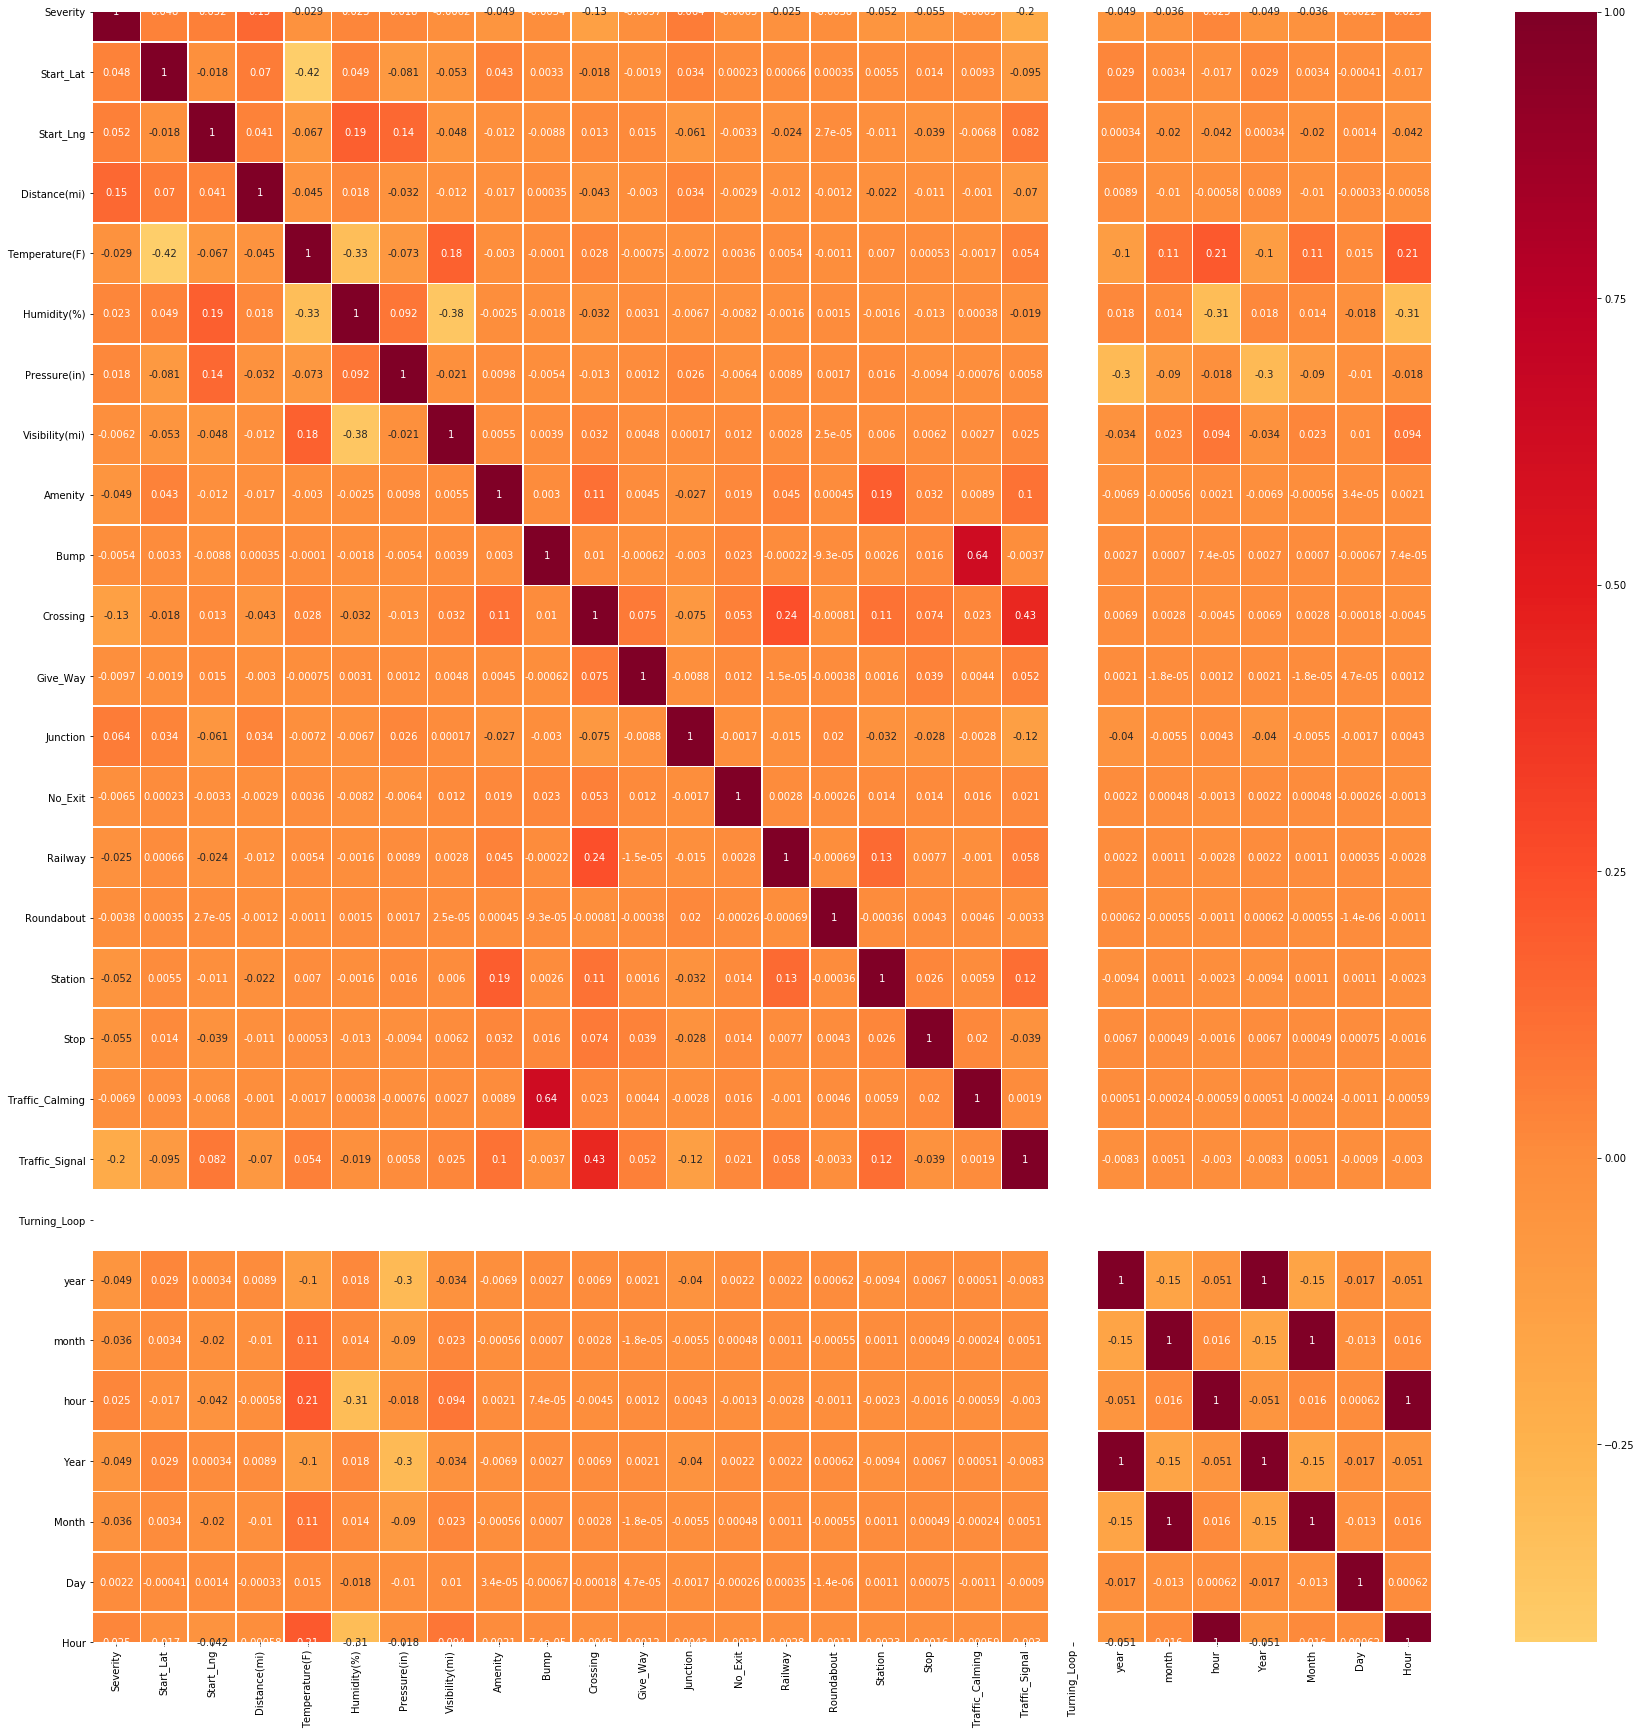

In [169]:
plt.figure(figsize = (30,30))
sns.heatmap(us_acc_new.corr(),cmap = 'YlOrRd',annot = True,center = 0,linewidths=.5)

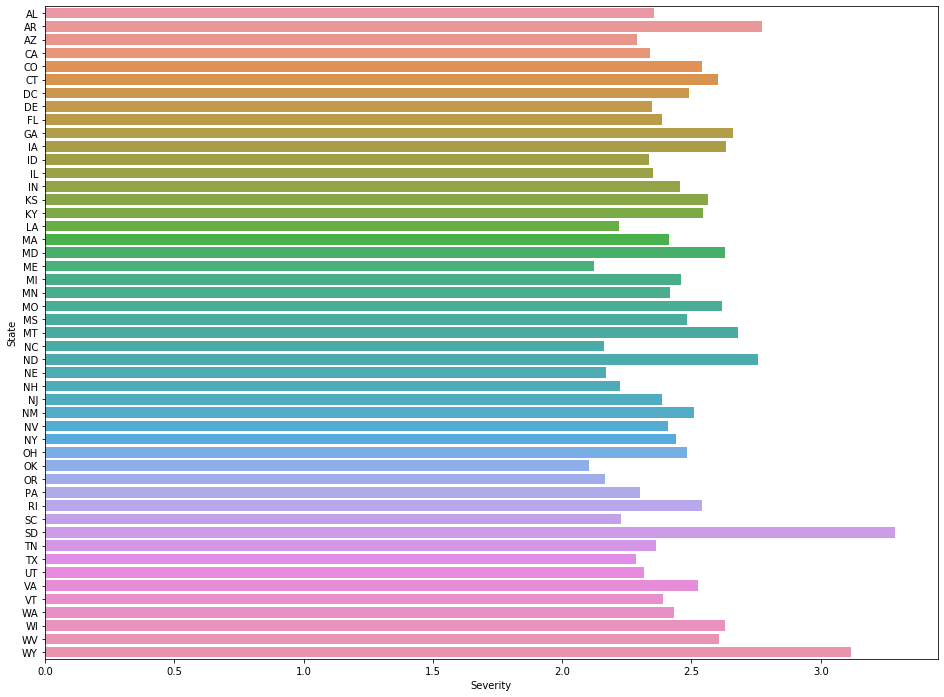

In [163]:
df_1 = us_acc_new.groupby('State').agg({'Severity':'mean'})
plt.figure(figsize = (16,12))
sns.barplot(x  = df_1.Severity , y = df_1.index,orient = 'h')
plt.show()

##### Model Building

1. Import libraries

In [114]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [171]:
x=us_acc_new.loc[:,['Distance(mi)','Source','Visibility(mi)','Wind_Speed(mph)','Traffic_Calming']]
y=us_acc_new.loc[:,[ 'Astronomical_Twilight']]
x

,Distance(mi),Source,Visibility(mi),Wind_Speed(mph),Traffic_Calming
0,0.010,MapQuest,10.0,NaN,False
1,0.010,MapQuest,10.0,NaN,False
2,0.010,MapQuest,10.0,NaN,False
3,0.010,MapQuest,9.0,NaN,False
4,0.010,MapQuest,6.0,NaN,False
...,...,...,...,...,...
2974330,0.543,Bing,10.0,NaN,False
2974331,0.338,Bing,10.0,NaN,False
2974332,0.561,Bing,10.0,NaN,False
2974333,0.772,Bing,10.0,NaN,False


In [172]:
y=y.fillna(value='Astronomical_Twilight')
y

,Astronomical_Twilight
0,Night
1,Day
2,Day
3,Day
4,Day
...,...
2974330,Day
2974331,Day
2974332,Day
2974333,Day
